In [1]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Backpack_df = pd.read_csv('Data/train.csv')
Backpack_df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [3]:
Backpack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


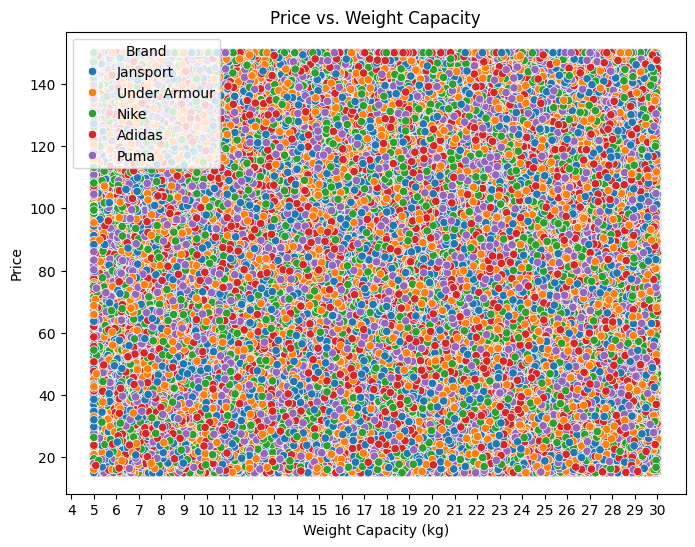

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight Capacity (kg)', y='Price', data=Backpack_df, hue='Brand')
plt.title('Price vs. Weight Capacity')
plt.xlabel('Weight Capacity (kg)')
plt.ylabel('Price')
plt.xticks(range(4, 31))
plt.show()

### Those backpacks don't have any relationship.
 Trying to make any multilinear regression without any relationships is only applying code. 

### Important columns in categorical values
- Brand
- Material
- Size
- Style
- Color

I will look for any relationship.

In [5]:
# to see all values in columns
for column in Backpack_df.columns:
    print(f"Value Counts for Column '{column}':")
    print(Backpack_df[column].value_counts(dropna=False))
    print("-" * 30)  # Separator for clarity

Value Counts for Column 'id':
id
0         1
199988    1
200004    1
200003    1
200002    1
         ..
99999     1
99998     1
99997     1
99996     1
299999    1
Name: count, Length: 300000, dtype: int64
------------------------------
Value Counts for Column 'Brand':
Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
NaN              9705
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Material':
Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
NaN           8347
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Size':
Size
Medium    101906
Large      98643
Small      92856
NaN         6595
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Compartments':
Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28

## Fill the NaN data
- New categorical
- NaN = 0.5 in data YES/NO 1/0
- Average value in 'Weight Capacity (kg)'

In [6]:
Backpack_df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [7]:
# new Brand NaN = small_brand
Backpack_df['Brand'] = Backpack_df['Brand'].fillna('small_brand')

In [8]:
# new Material NaN = mix_mat
Backpack_df['Material'] = Backpack_df['Material'].fillna('mix_mat')

In [9]:
# new Size NaN = non_Standar
Backpack_df['Size'] = Backpack_df['Size'].fillna('non_Standar')

In [10]:
# 'Laptop Compartment'  yes = 1 No = 0 Nan = 0.5 'Laptop Compartment'
Backpack_df['Laptop Compartment'] = Backpack_df['Laptop Compartment'].replace(
    to_replace={'Yes': 1, 'No': 0}).fillna('0.5')

/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_63822/2323031162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Backpack_df['Laptop Compartment'] = Backpack_df['Laptop Compartment'].replace(


In [11]:
# 'Waterproof' yes = 1 No = 0 Nan = 0.5 
Backpack_df['Waterproof'] = Backpack_df['Waterproof'].replace(
    to_replace={'Yes': 1, 'No': 0}).fillna('0.5')

/var/folders/_2/nh5rkkms0rbdwypbjgwb50xh0000gn/T/ipykernel_63822/220305903.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Backpack_df['Waterproof'] = Backpack_df['Waterproof'].replace(


In [12]:
# new 'Style' NaN = non_Bag
Backpack_df['Style'] = Backpack_df['Style'].fillna('non_Bag')

In [13]:
# new 'Color' NaN = complex
Backpack_df['Color'] = Backpack_df['Color'].fillna('complex')

In [14]:
# 'Weight Capacity (kg)' NaN = average ()
Backpack_df['Weight Capacity (kg)'] = Backpack_df['Weight Capacity (kg)'].fillna(
    Backpack_df['Weight Capacity (kg)'].mean())

In [15]:
# to see all values in columns
for column in Backpack_df.columns:
    print(f"Value Counts for Column '{column}':")
    print(Backpack_df[column].value_counts(dropna=False))
    print("-" * 30)  # Separator for clarity

Value Counts for Column 'id':
id
0         1
199988    1
200004    1
200003    1
200002    1
         ..
99999     1
99998     1
99997     1
99996     1
299999    1
Name: count, Length: 300000, dtype: int64
------------------------------
Value Counts for Column 'Brand':
Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
small_brand      9705
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Material':
Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
mix_mat       8347
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Size':
Size
Medium         101906
Large           98643
Small           92856
non_Standar      6595
Name: count, dtype: int64
------------------------------
Value Counts for Column 'Compartments':
Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0

### A continuum on 'Weight Capacity (kg)' makes it difficult to find relations
- divide the carrying capacity in a range of 1 kg
- divide the price into five units

In [16]:
# makes the weight capacity in range
binsW = range(4, 32, 1 )  # Creates bins:
Backpack_df['Weight range'] = pd.cut(Backpack_df['Weight Capacity (kg)'], bins=binsW, right=False)

In [17]:
Backpack_df['Weight range'].value_counts().sort_index()

Weight range
[4, 5)          0
[5, 6)       6456
[6, 7)      10948
[7, 8)      10509
[8, 9)      10884
[9, 10)     10593
[10, 11)    11012
[11, 12)    13007
[12, 13)    13330
[13, 14)    11700
[14, 15)    12280
[15, 16)    13130
[16, 17)    12158
[17, 18)    13228
[18, 19)    12655
[19, 20)    12861
[20, 21)    13274
[21, 22)    11858
[22, 23)    12056
[23, 24)    13057
[24, 25)    13286
[25, 26)    12806
[26, 27)    12545
[27, 28)    13627
[28, 29)    13146
[29, 30)     9409
[30, 31)      185
Name: count, dtype: int64

In [22]:
# makes the weight capacity in range
binsP = range(10, 160, 5 )  # Creates bins:
Backpack_df['Price range'] = pd.cut(Backpack_df['Price'], bins=binsP, right=False)

In [23]:
Backpack_df['Price range'].value_counts().sort_index()

Price range
[10, 15)          0
[15, 20)      11674
[20, 25)      11824
[25, 30)      11553
[30, 35)      11723
[35, 40)      11164
[40, 45)      11702
[45, 50)      11111
[50, 55)      11666
[55, 60)      11237
[60, 65)      11013
[65, 70)      10785
[70, 75)      11181
[75, 80)      11177
[80, 85)      11437
[85, 90)      11101
[90, 95)      10847
[95, 100)     10653
[100, 105)    10981
[105, 110)    10662
[110, 115)    11463
[115, 120)    10790
[120, 125)    11176
[125, 130)    11367
[130, 135)    11186
[135, 140)    10332
[140, 145)     8249
[145, 150)     6418
[150, 155)     5528
Name: count, dtype: int64

In [ ]:
Backpack_df['Weight range R (kg)'].value_counts().sort_index()

TypeError: Invalid object type at position 0

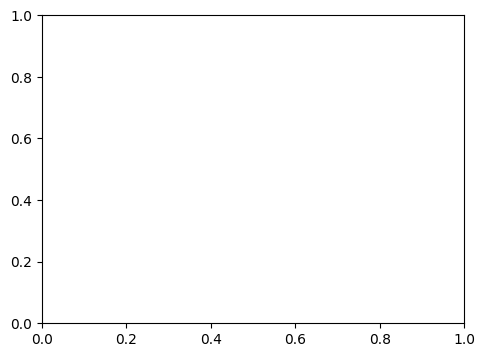

In [25]:
for brand in Backpack_df['Brand'].unique():
    BP_df = Backpack_df[Backpack_df['Brand'] == brand]

    # Create separate plots for sizes
    plt.figure(figsize=(12, 4))

    # Plot for small
    plt.subplot(1, 2, 1)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Small'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Small {brand}')

    # Plot for Medium
    plt.subplot(1, 2, 2)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Medium'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Medium {brand}')

    # Plot for Large
    plt.subplot(2, 2, 1)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'Large '], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution Large {brand}')

    # Plot for non_Standar 
    plt.subplot(2, 2, 2)
    sns.histplot(data= Backpack_df[Backpack_df['Size'] == 'non_Standar'], x='Price range', binwidth=2, hue='Material', kde=True)
    plt.title(f'Price distribution non_Standar {brand}')
    
    plt.tight_layout()
   # plt.savefig(f'fig/City_{city}.png')
    plt.show()